In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2 
import imghdr
import os 
import tensorflow  
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
data_dir = "/content/drive/MyDrive/plant_data(5)"
training_data = "/content/drive/MyDrive/plant_data_train(5)"
test_data = "/content/drive/MyDrive/plant_data_test(5)"

In [ ]:
from keras.layers import Input, Lambda,Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Preprocessing of images
def preprocess_image(image_path):
  img = tf.keras.utils.load_img(image_path, target_size = (299,299))

  img_array = tf.keras.utils.img_to_array(img)
  processed_img = preprocess_input(img_array)

  return processed_img

In [ ]:
def preprocess_image_1(image_path):
  if isinstance(image_path, str):
    # Load the image from the file path
    img = tf.keras.utils.load_img(image_path, target_size=(299, 299))
  else:
    # Assume that image_path is already a numpy array
    img = tf.keras.preprocessing.image.array_to_img(image_path)

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  processed_img = preprocess_input(img_array)

  return processed_img

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        preprocess_image(image_path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_image_1, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_image_1)

In [ ]:
training_set = train_datagen.flow_from_directory(training_data,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5914 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_data,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1498 images belonging to 10 classes.


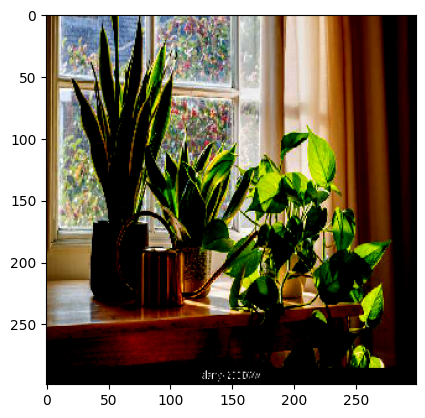

(299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

# Get the next batch of images and labels
batch_images, batch_labels = test_set.next()

# Select the first image in the batch
image = batch_images[1]


# Display the image
plt.imshow(image)
plt.show()
print(batch_images[1].shape)

In [ ]:
inresnet=InceptionResNetV2(weights='imagenet',include_top=False, input_shape = (299,299,3))

219055592/219055592 [==============================] - 9s 0us/step


In [ ]:
for layer in inresnet.layers:
  layer.trainable=False

In [ ]:
x = inresnet.output 
x = GlobalAveragePooling2D()(x)

In [ ]:
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs = inresnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.layers[-1].output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [ ]:
hist = model.fit(training_set,batch_size=32 ,epochs=30, steps_per_epoch = 150, validation_data=test_set)
# print('Input data shape:', X_train.shape)
# print('Target label shape:', y_train.shape)
# print('Model output shape:', model.predict(X_train).shape)

Epoch 1/30
105/150 [====================>.........] - ETA: 12:45 - loss: 1.6962 - accuracy: 0.4377

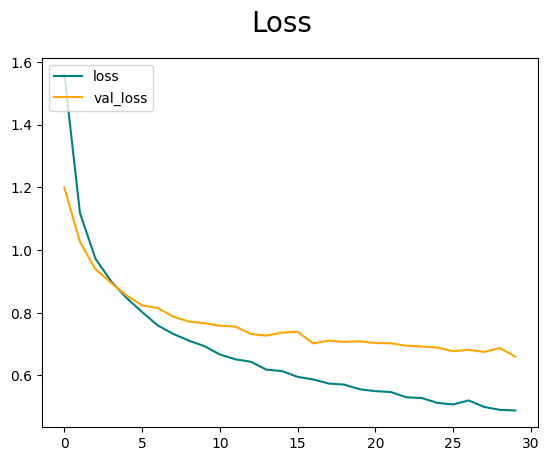

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

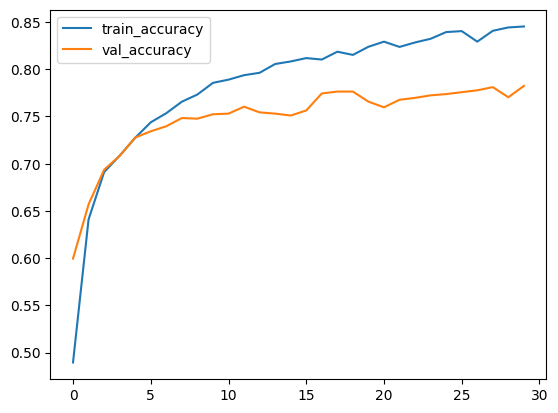

In [ ]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models','plant_classification_inception_v2_m2'))

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model_in = load_model('/content/drive/MyDrive/models/plant_classification_inception_v2_m2')
# model_in.predict('/content/drive/MyDrive/rubber_plant_image.jpg')

1/1 [==============================] - 0s 52ms/step


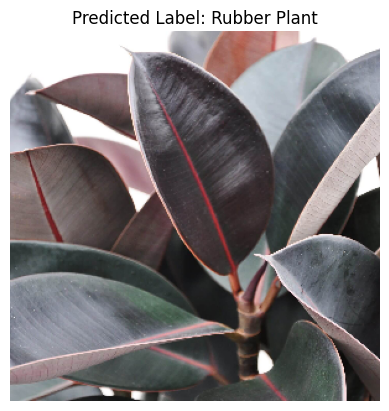

In [ ]:
image_path_test = '/content/drive/MyDrive/rubber_plant_image.jpg' 
new_img = tf.keras.utils.load_img(image_path_test, target_size=(299, 299))
# Load and preprocess the image
# new_image = tf.keras.utils.load_img(image_path_test, target_size=(299, 299))
# new_image_array = tf.keras.utils.img_to_array(new_image)
# new_processed_image = preprocess_image(new_image_array)



processed_img = preprocess_image(image_path_test)

# Predict the class of the image
prediction = model_in.predict(np.array([processed_img]))
predicted_class_index = np.argmax(prediction)

# Get the predicted class label
class_labels = list(training_set.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]
# print(predicted_class_label)

import matplotlib.pyplot as plt
plt.imshow(new_img)
plt.title('Predicted Label: {}'.format(predicted_class_label))
plt.axis('off')
plt.show()